# 绘图和可视化

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Figure和Subplot

In [2]:
fig = plt.figure()

In [4]:
ax1 = fig.add_subplot(2, 2, 1) # 图像2x2，且当前选中的是4个subplot的第一个（编号从1开始）

In [5]:
ax2 = fig.add_subplot(2, 2, 2)

In [6]:
ax3 = fig.add_subplot(2, 2, 3)

In [7]:
from numpy.random import randn

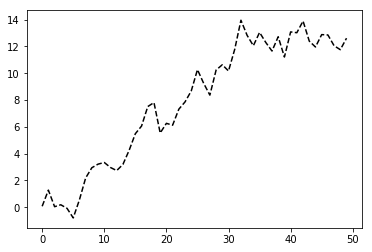

In [9]:
plt.plot(randn(50).cumsum(), 'k--')              # k--是一个线型选项，用于绘制黑色虚线图

In [11]:
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)

In [17]:
pc = ax2.scatter(np.arange(30), np.arange(30) + 3*randn(30))

#### 可以创建一个新的Figure，并返回一个含有已创建的subplot对象的Numpy数组

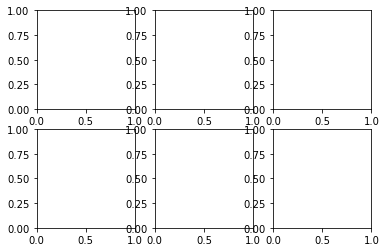

In [21]:
fig, axes = plt.subplots(2, 3)

In [22]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000877F588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000008EB0828>]], dtype=object)

In [24]:
axes[0, 1]

#### Figure的subplots_adjust方法可以修改间距

In [26]:
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None) # wspace和hspace用于控制高度和宽度的百分比.

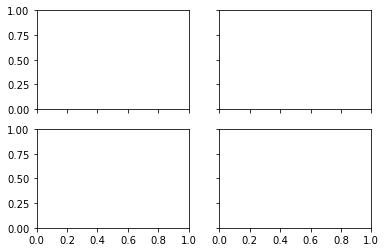

In [28]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

In [29]:
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)

In [40]:
plt.subplots_adjust(wspace=0, hspace=0)  # 注意看下面的代码，是对fig调用的

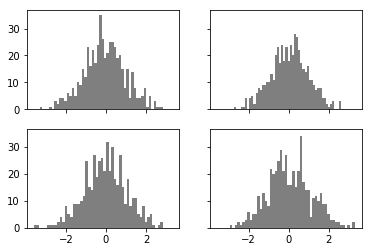

In [37]:
fig

In [41]:
fig.subplots_adjust(wspace=0, hspace=0)  # 调整了间距

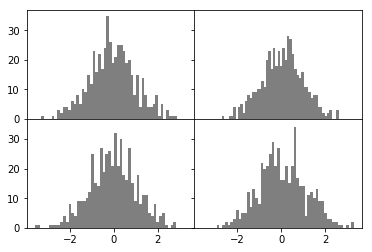

In [42]:
fig # 发现轴标签可能会重叠

### 颜色、标记和线型

#### plot函数接受一组X和Y坐标，还可以接受一个表示颜色和线型的字符串缩写

In [44]:
ax.plot(x, y ,'g--')  # 根据x和y绘制绿色虚线

NameError: name 'ax' is not defined

In [45]:
# 上述代码等价于：
ax.ployt(x, y, linestyle='--', color='g')

NameError: name 'ax' is not defined

#### 常用的颜色都有一个缩写词，要使用其他任意颜色则可以指定其RGB值得形式使用，例如‘#CECECE’

#### 线型图还可以加上一些标记，以强调实际的数据点。由于matplotlib创建的是连续的线型图（点与点之间插值），因此有时可能不太容易看出真实数据点的位置。标记也可以放到格式字符串中，但标记类型和线型必须放到颜色后面

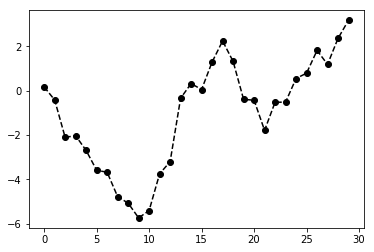

In [47]:
plt.plot(randn(30).cumsum(), 'ko--')

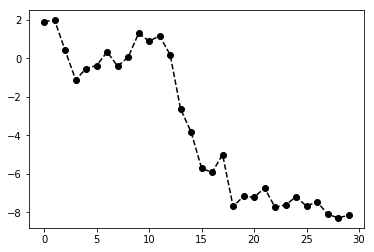

In [50]:
# 可以写的更加明确
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

#### 在线型图中，非实际数据点默认是按线型方式插值的。可以通过drawstyle选项修改

In [51]:
data = randn(30).cumsum()

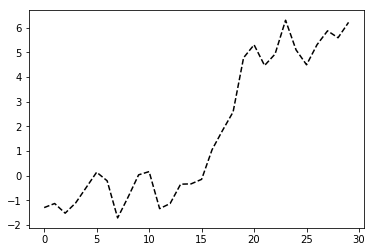

In [53]:
plt.plot(data, 'k--', label='Default')

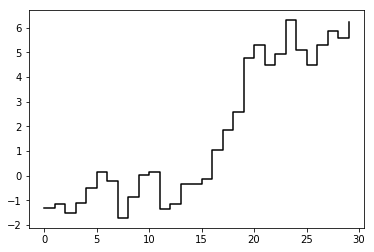

In [54]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

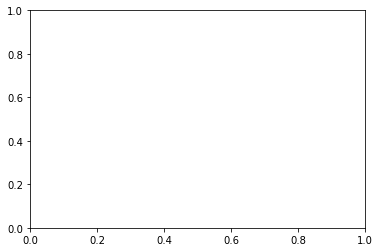

In [59]:
plt.legend(loc='best')

#### 刻度、标签和图例

##### 调用时不带参数：plt.xlim()返回当前的X轴绘图范围
##### 调用带参数：plt.xlim([0,10])会将X轴的范围设置为0-10

### 设置标题、轴标签、刻度以及刻度标签

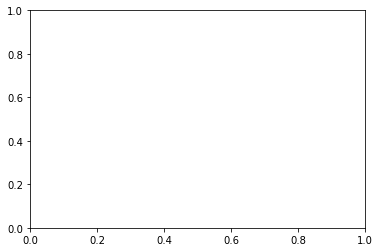

In [60]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

In [61]:
ax.plot(randn(1000).cumsum())

#### 要修改x的刻度，最简单的办法是使用set_xticks和set_xticklabels
前者告诉matplotlib要将刻度放在数据范围中的哪些位置，默认情况下，这些位置也就是刻度标签。
但是我们可以通过set_xticklabels将任何洽谈的值用作标签

In [62]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [63]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize='small') 

#### 最后用set_xlabels为X轴设置一个名词，用set_title设置标题

In [64]:
ax.set_title('My first matplotlib plot')

In [75]:
ax.set_xlabel('Stages')
ax.set_ylabel('size')

In [70]:
ax

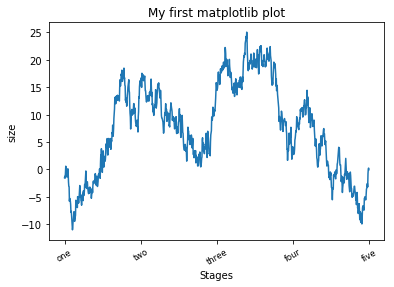

In [76]:
fig      # 调用fig来显示，而不是调用ax，ax是轴，设置属性用的

### 添加图例

#### 图例（legend）是另一种用于标识图表元素的重要工具。
#### 两种方法：
1. 在添加subplot的时候传入label参数
2. 

In [77]:
rig = plt.figure();ax = fig.add_subplot(1, 1, 1)

In [79]:
ax.plot(randn(1000).cumsum(), 'k', label='one')

In [80]:
ax.plot(randn(1000).cumsum(), 'k--', label='two')

In [81]:
ax.plot(randn(1000).cumsum(), 'k.', label='three')

In [84]:
ax.legend()

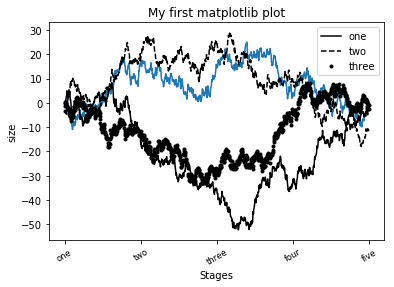

In [85]:
fig

### 注解以及在Subplot上绘图

#### 有时候希望绘制一些自定义的注解（比如文本、箭头或者其他图标）

#### 注解可以通过text\arrow和annotate等函数进行添加
text可以将文本绘制在图表的指定坐标（x，y），还可以加一些自定义格式

In [86]:
ax.text(x,y,'Hello world',family='monospace', fontsize=10)

NameError: name 'x' is not defined

#### 注解中既可以含有文本也可以含有箭头
例如我们根据2007年依赖的标准普尔500指数收盘价格绘制一张曲线图，并标出2008年到2009年金融危机期间的一些重要日期

In [119]:
from datetime import datetime
import pandas as pd

In [120]:
fig = plt.figure()

In [121]:
ax = fig.add_subplot(1, 1, 1)

In [122]:
data = pd.read_csv('ch08/spx.csv', index_col=0, parse_dates=True)

In [123]:
spx = data['SPX']

In [124]:
spx

1990-02-01     328.79
1990-02-02     330.92
1990-02-05     331.85
1990-02-06     329.66
1990-02-07     333.75
1990-02-08     332.96
1990-02-09     333.62
1990-02-12     330.08
1990-02-13     331.02
1990-02-14     332.01
1990-02-15     334.89
1990-02-16     332.72
1990-02-20     327.99
1990-02-21     327.67
1990-02-22     325.70
1990-02-23     324.15
1990-02-26     328.67
1990-02-27     330.26
1990-02-28     331.89
1990-03-01     332.74
1990-03-02     335.54
1990-03-05     333.74
1990-03-06     337.93
1990-03-07     336.95
1990-03-08     340.27
1990-03-09     337.93
1990-03-12     338.67
1990-03-13     336.00
1990-03-14     336.87
1990-03-15     338.07
               ...   
2011-09-02    1173.97
2011-09-06    1165.24
2011-09-07    1198.62
2011-09-08    1185.90
2011-09-09    1154.23
2011-09-12    1162.27
2011-09-13    1172.87
2011-09-14    1188.68
2011-09-15    1209.11
2011-09-16    1216.01
2011-09-19    1204.09
2011-09-20    1202.09
2011-09-21    1166.76
2011-09-22    1129.56
2011-09-23

In [125]:
spx.plot(ax=ax, style='k-')

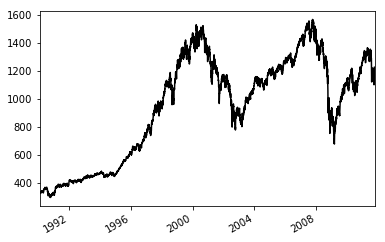

In [126]:
fig

In [127]:
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy'),
]

In [128]:
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date)+50),
               xytext=(date, spx.asof(date)+200),
               arrowprops=dict(facecolor='black'),
               horizontalalignment='left', verticalalignment='top')
    

In [129]:
# 放大到2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

(600, 1800)

In [130]:
ax.set_title('Important dates in 2008-2009 financial crisis')
ax

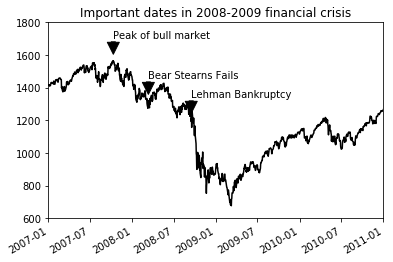

In [131]:
fig

#### 为图表添加一个图形

In [132]:
fig = plt.figure()

In [133]:
ax = fig.add_subplot(1, 1, 1)

In [134]:
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)

In [135]:
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)

In [136]:
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

In [137]:
ax.add_patch(rect)

In [138]:
ax.add_patch(circ)

In [139]:
ax.add_patch(pgon)

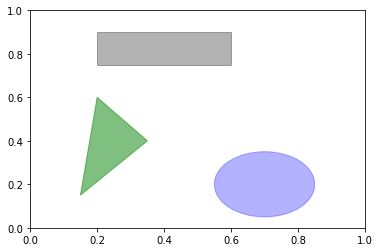

In [140]:
fig

### 将图表保存到文件
#### plt.savefig可以将当前图表保存到文件，例如要将图表保存为SVG文件，你只需要输入：

In [141]:
plt.savefig('figpath.svg')

In [142]:
# 要得到一张带有最小白边且分辨率为400DPI的PNG图片。可以：

In [155]:
fig.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [145]:
# savefig并非一定要写入磁盘，也可以写入任何文件型的对象，比如StringIO
from io import StringIO

In [151]:
buffer = StringIO()

In [154]:
fig.savefig(buffer)

TypeError: unicode argument expected, got 'str'

### pandas中的绘图函数

#### 线型图

In [157]:
from pandas import Series, DataFrame
s = Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))

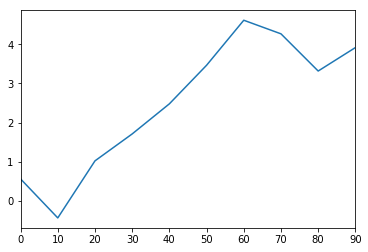

In [159]:
s.plot()        # 索引用以绘制X轴，可以通过use_index=False禁用该功能
# x轴的刻度和界限可以通过xticks和xlim选项进行调节，Y轴就用yticks和ylim

#### DataFrame的plot方法会在一个subplot中为各列绘制一条线，并自动创建图例

In [161]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
              columns=['A','B','C','D'],
              index=np.arange(0,100, 10))

In [162]:
df


,A,B,C,D
0,-0.875211,2.090906,1.540216,0.190590
10,-1.146609,1.827217,-0.216127,0.494522
20,-0.619081,1.880412,0.637936,1.274842
30,-0.678680,0.582110,-0.484246,2.737201
40,-0.900958,0.458075,-1.382680,2.181800
50,-1.434719,-1.195754,-2.049952,0.726993
60,-1.493804,-0.338112,-0.682225,2.302028
70,0.596771,0.493070,-0.962038,2.324319
80,0.685665,-0.781977,-0.065416,4.035147
90,1.515922,-1.061400,0.500660,5.483598


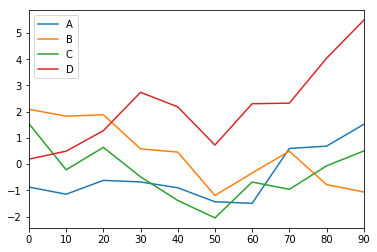

In [163]:
df.plot()

#### 柱状图

##### 在代码中加上参数kind='bar'(垂直柱状图)或kind='barh'(水平柱状图)即可生成柱状图。

##### 此时，Series和DataFrame的索引会被用作X（bar）或Y（barh）刻度

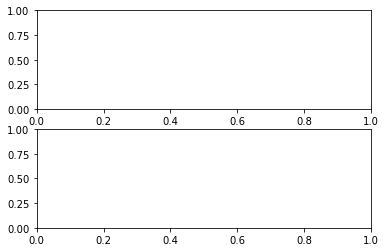

In [165]:
fig, axes = plt.subplots(2, 1)

In [166]:
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))

In [167]:
data.plot(kind='bar', ax=axes[0], color='k',alpha=0.7)  # axes[0]选择第一个面板

In [168]:
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

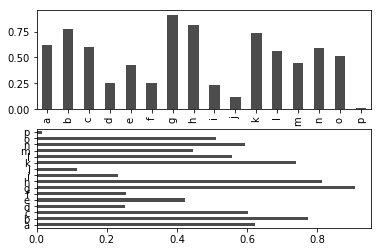

In [169]:
fig

In [170]:
# 对于DataFrame，柱状图会将每一行的值分为一组
df = DataFrame(np.random.randn(6,4), index=['one', 'three','four', 'five', 'five', 'six'],
              columns=pd.Index(['A','B','C','D'], name='Genus'))

In [171]:
df

Genus,A,B,C,D
one,0.235955,-1.232198,0.309490,0.190264
three,0.245657,-0.603572,0.148808,0.601517
four,1.409268,0.176346,0.645991,0.973367
five,-0.267359,-0.085241,-0.837062,-1.756934
five,-0.143262,-1.301666,0.375848,-1.112651
six,-2.078323,0.385381,0.100328,1.400051


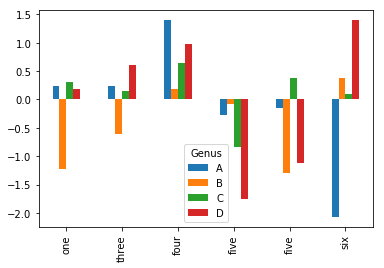

In [172]:
df.plot(kind='bar')

#### 观察发现，DataFrame各列的名称“Genus”被用作了图例的标题。设置stacked=True即可为DataFrame生成堆积柱状图，这样每行的值就会被堆积在一起

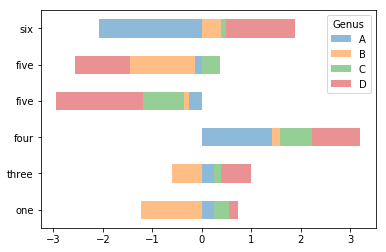

In [173]:
df.plot(kind='barh', stacked=True, alpha=0.5)

#### 柱状图有一个非常不错的用法，利用value_counts图形化显示Series中各值的出现频率

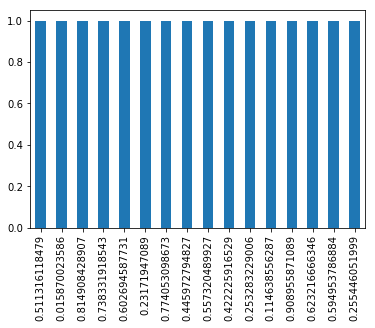

In [174]:
data.value_counts().plot(kind='bar')

### 直方图和密度图

#### 直方图（histogram）是一种可以对值频率进行离散化显示的柱状图

#### 密度图是通过计算“可能会产生观测数据的连续概率分布的估计”，一般的过程是将该分布近似为一组核（即诸如正态（高斯）分布之类的简单的分布）。因此密度也被称为KDE（Kernel Density Estimate，核密度估计）图。调用plot加上参数kind='kde'即可生成密度图

### 散布图
#### 散布图（scatte plot）是观测两个一维数据序列之间的关系的有效手段

In [175]:
macro = pd.read_csv('ch08/macrodata.csv')

In [177]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [178]:
trans_data = np.log(data).diff().dropna()

In [179]:
trans_data

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000
6,0.006745,0.004980,-0.127155,0.074108
7,0.003021,0.001418,-0.030110,0.117783
8,-0.001006,0.007062,0.034338,0.076373
9,0.003683,0.005614,-0.034338,0.028988
10,0.002003,0.008362,0.013015,-0.028988


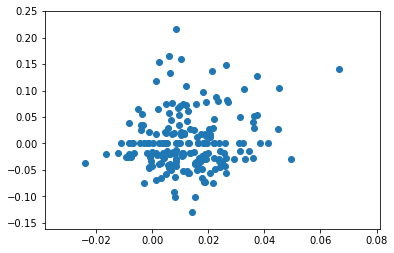

In [183]:
# 利用plt.scatter可以轻松绘制散布图
plt.scatter(trans_data['m1'], trans_data['unemp'])

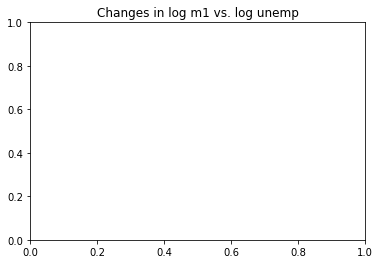

In [189]:
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000128B4D30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000014B87DA0>]], dtype=object)

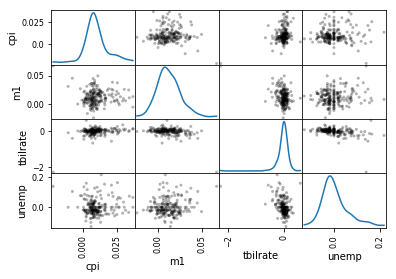

In [190]:
pd.plotting.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)

### 绘制地图

In [273]:
data = pd.read_csv('ch08/Haiti.csv')

In [274]:
data

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to ...,"1. Urgences | Emergency, 2. Urgences logistiqu...",50.226029,5.729886,NO,NO
2,4050,how haiti is right now and how it was during t...,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to ...,"2. Urgences logistiques | Vital Lines, 8. Autr...",22.278381,114.174287,NO,NO
3,4049,Lost person,20/06/2010 21:59,Genoca,We are family members of Juan Antonio Zuniga O...,"1. Urgences | Emergency,",44.407062,8.933989,NO,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO
8,4038,No electricity in pernier,15/03/2010 10:58,Pernier,why the people who lives in pernier doesn't fi...,"2. Urgences logistiques | Vital Lines, 2f. San...",18.517443,-72.236841,YES,NO
9,4037,Shelter and food needed at Lamentin 54 and Rue...,15/03/2010 11:00,Intersection of Lamentin 54 and Rue St Juste,"GOOD EVENING ONG, I'M VERY HAPPY FOR THE AID Y...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.547790,-72.410010,YES,NO


In [275]:
# 每一行表示一条从某人的手机上发送的紧急或其他问题的报告，每条报告有一个时间戳和位置（经度和纬度）
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [276]:
# CATEGORY字段含有一组以都好分隔的代码，这些代码表示消息的类型
data['CATEGORY']

0             1. Urgences | Emergency, 3. Public Health, 
1       1. Urgences | Emergency, 2. Urgences logistiqu...
2       2. Urgences logistiques | Vital Lines, 8. Autr...
3                               1. Urgences | Emergency, 
4                               1. Urgences | Emergency, 
5                          5e. Communication lines down, 
6       4. Menaces | Security Threats, 4e. Assainissem...
7                         4. Menaces | Security Threats, 
8       2. Urgences logistiques | Vital Lines, 2f. San...
9       2. Urgences logistiques | Vital Lines, 2d. Ref...
10      1a. Highly vulnerable, 2. Urgences logistiques...
11      4. Menaces | Security Threats, 4e. Assainissem...
12      2. Urgences logistiques | Vital Lines, 2d. Ref...
13      2. Urgences logistiques | Vital Lines, 2b. Pen...
14                                     3. Public Health, 
15                2. Urgences logistiques | Vital Lines, 
16      1. Urgences | Emergency, 7. Secours | Services...
17            

In [277]:
# 仔细观察，发现类型缺失了，因此我们需要丢弃这些数据点
# 此外，调用describe还能发现数据中存在一些异常的地理位置

In [278]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [279]:
# 清楚错误位置信息并移除缺失分类的信息
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) & (data.LONGITUDE > -75) & (data.LONGITUDE < -70) & data.CATEGORY.notnull()]

In [280]:
# 获取所有的分类列表
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

In [281]:
def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

In [282]:
# 将各个分类信息拆分为编码和英语名称
def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split('|')[1]
    return code, names.strip()

In [283]:
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

In [284]:
# 做一个将编码跟名称映射起来的字典
all_cats = get_all_categories(data.CATEGORY)

In [285]:
# 生成器表达式
english_mapping = dict(get_english(x) for x in all_cats)

In [286]:
english_mapping['2a']

'Food Shortage'

In [287]:
english_mapping['6c']

'Earthquake and aftershocks'

In [288]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

In [289]:
all_codes = get_code(all_cats)

In [290]:
# 抽取唯一的分类编码
code_index = pd.Index(np.unique(all_codes))

In [291]:
# 构造全零DataFrame
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))), index=data.index, columns=code_index)

In [292]:
dummy_frame

,1,1a,1b,1c,1d,2,2a,2b,2c,2d,...,7c,7d,7g,7h,8,8a,8c,8d,8e,8f
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [293]:
# 构造矩阵
for row , cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.loc[row, codes] = 1

In [294]:
data = data.join(dummy_frame.add_prefix('category_'))

In [295]:
data.ix[:, 10:15]

E:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


,category_1,category_1a,category_1b,category_1c,category_1d
0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0
10,0.0,1.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0


In [296]:
from mpl_toolkits.basemap import Basemap  # 需要下载basemap库，conda没有自带

In [266]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


E:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [311]:
def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25, lllon=-75, urlon=-71):
    # 创建极球面投影的Basemap实例
    m = Basemap(ax=ax, projection='stere',
               lon_0=(urlon + lllon) / 2,
                lat_0=(urlat + lllat) / 2,
                llcrnrlat=lllat, urcrnrlat=urlat,
                llcrnrlon=lllon, urcrnrlon=urlon,
                resolution='f')
    # 绘制海岸线，州界，国界以及地图边界
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

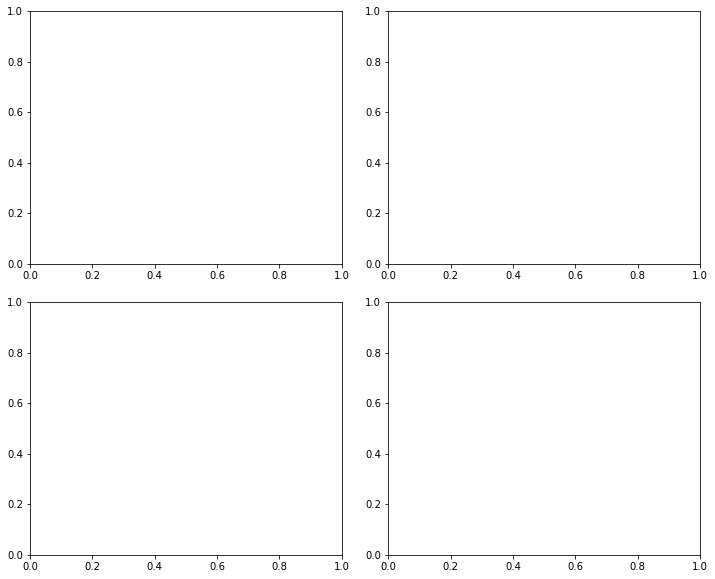

In [312]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
fig.subplots_adjust(hspace=0.15, wspace=0.15)

In [313]:
to_plot = ['2a', '1','3c','7a']

In [314]:
lllat = 17.25
urlat=20.25
lllon=-75
urlon=-71

In [315]:
for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat, lllon=lllon, urlon=urlon)

In [316]:
cat_data =data[data['category_%s' % code] == 1] 
cat_data

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED,...,category_7c,category_7d,category_7g,category_7h,category_8,category_8a,category_8c,category_8d,category_8e,category_8f
152,3858,Tent and food needed at Avenue Christoph #99,03/03/2010 22:29,"Avenue Christoph #99, Turgeau, Port au Prince",english: \t\n\nMy name is PEDRO Ophilien Andr...,"2d. Refuge | Shelter needed, 7a. Distribution ...",18.533900,-72.334200,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153,3856,Help needed at Delmas 15,01/03/2010 22:23,Delmas 15,english: \t\n\nWe are sufering in Delma 15.We...,7a. Distribution d'aliments | Food distributio...,18.554070,-72.313970,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154,3855,"No help received yet in Mahotiere 79, Carrefour",02/03/2010 00:02,"Mahotiere 79, Carrefour",english: \t\n\nWe need help at Mahotiere 79. ...,7a. Distribution d'aliments | Food distributio...,18.533553,-72.398201,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155,3854,Help needed in Petit Goave,03/03/2010 13:24,Petit Goave,english: \t\n\nUnited Nation please take care...,7a. Distribution d'aliments | Food distributio...,18.434000,-72.857600,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
170,3839,Food and Tents Needed in Ti Goave,21/01/2010 13:00,Ti Goave,english: \t\n\nMy Family in Ti Goave and my m...,"7. Secours | Services Available, 2d. Refuge | ...",18.428800,-72.862700,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171,3838,"Food, Water, and Shelter Needed nead Taciana H...",21/01/2010 13:55,"Clady Loute, Ogane Chatuley, Leogane","english: \t\n\nClaudy Loute, Ogane Chatuley i...","7. Secours | Services Available, 2d. Refuge | ...",18.513040,-72.617420,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179,3830,"Food, Water, Shelter Needed",01/03/2010 15:01,"28 Estime Street, Port-au-Prince",english: \t\n\nGood morning! my name is Ralph...,"2. Urgences logistiques | Vital Lines, 2b. Pen...",18.546060,-72.327400,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
219,3788,"Pregnant woman needs help in Delmas 3, Port au...",01/03/2010 14:35,"Delmas 3, Port au Prince",english: \t\n\nHi! my name is shakespeare and...,7d. Services de sante | Hospital/Clinics Opera...,18.558618,-72.322254,YES,NO,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232,3774,"Food, water and tents needed in Turgeau",28/02/2010 16:28,"Canada Turgeau, Port au Prince","We in Canada turjo quote, we need food, water ...","2d. Refuge | Shelter needed, 7a. Distribution ...",18.533770,-72.330012,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
237,3769,Aid needed - distribution problems - Petit Goave,02/03/2010 12:37,Petit Goave,english: \t\n\nPLEASE UNITED NATION KEEP AN E...,"2b. Penurie d'eau | Water shortage, 2a. Penuri...",18.432710,-72.862780,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [319]:
# 计算地图的投影坐标
#x,y = m(cat_data.LONGITUDE, cat_data.LATITUDE)  # 报错，改为下面语句
x,y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)
# m(cat_data.LOCATION)

In [320]:
m.plot(x, y, 'k.', alpha=0.5)

E:\Anaconda\lib\site-packages\mpl_toolkits\basemap\__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
E:\Anaconda\lib\site-packages\mpl_toolkits\basemap\__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [321]:
ax.set_title('%s: %s' %(code, english_mapping[code]))

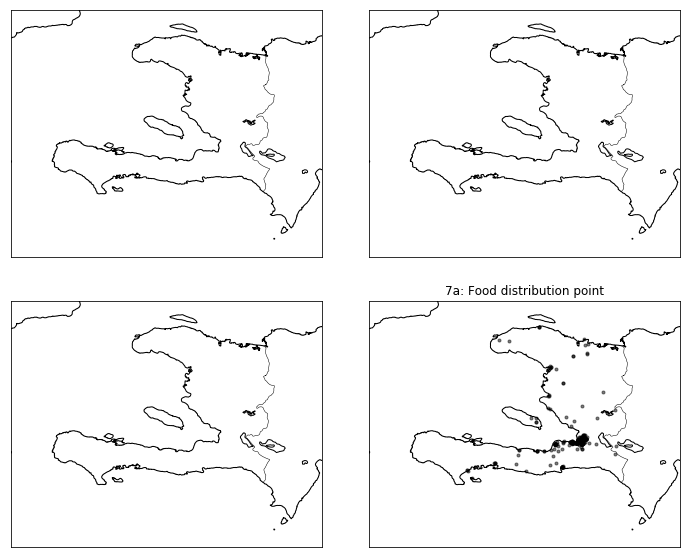

In [322]:
fig

In [323]:
shapefile_path = 'ch08/PortAuPrince_Roads/PortAuPrince_Roads'
m.readshapefile(shapefile_path, 'roads')

(1583,
 3,
 [-72.749246, 18.409952, 0.0, 0.0],
 [-71.973789, 18.7147105, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x150f6c18>)

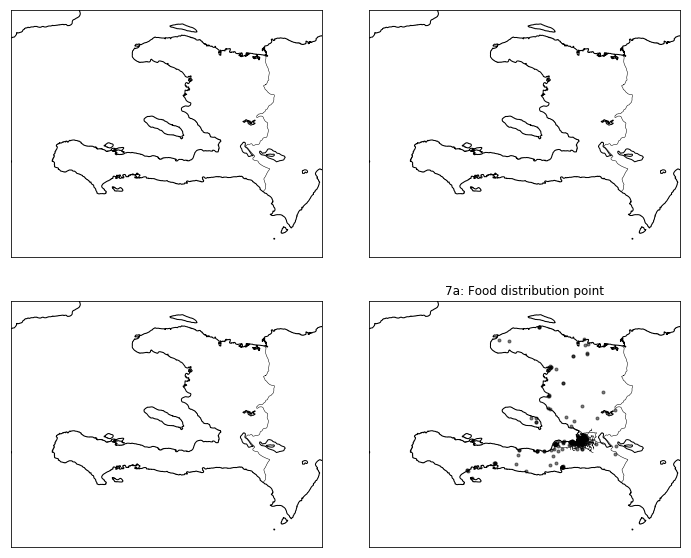

In [324]:
fig